In [34]:
#An example how to create,train and use Network structure:
x_mock_data = np.array([[0,0],[0,1],[1,0],[1,1]])
y_mock_data = np.array([0,1,1,0])[:,None]

NN = Network([2,4,1],activations=["sigmoid"]) #define a network architecture & activation #2 units input, 4 hiden unites, 1 output layer
NN.set_lr(1.0,momentum=0.0)  #set learning rate and momentum
NN.fit(x_mock_data,y_mock_data,batch_size=4, #fit to data
       epochs=2000,x_val=x_mock_data,y_true_val=y_mock_data) 
print("\n Targets:")
print((y_mock_data))
print("\n Predictions:")
print(NN.predict(x_mock_data)) # get predictions
print("\n Error:")
print(NN.evaluate(x_mock_data,y_mock_data)) # get error

2000:	 train err: 0.05839	 val err: 0.05825	 patience: 0																																																																																																																																																																																																																																																																																																																																																																																																																																																								
 Targets:
[[0]
 [1]
 [1]
 [0]]

 Predictions:
[[0.18305374]
 [0.75130855]
 [0.77423557]
 [0.29437576]]

 Error:
[0.05824569]


In [1]:
#IMPORTS
import numpy as np
import os,sys,math
import matplotlib.pyplot as plt
sys.path.append(os.getcwd()+"/Code") # so that we can import the modules below
#feel free to have a look into Network, Layer or RBM implementations to see how they work
from NN import Network,Layer,pretrain_autoencoder,plot_results,plot_alphadigit_results
from RBM import RBM
from sklearn.model_selection import train_test_split
#DATASETS DIRECTORIES
MNIST_TRAIN_DIR="./Data/MNIST1_train.npz"
MNIST_TEST_1_DIR="./Data/MNIST1_test_1.npz"
PATCHES_DIR="./Data/PATCHES.npy"
ALPHADIGITS_DIR="./Data/binaryalphadigits.npz"

### Load Mnist Dataset

In [17]:
#load the MNIST dataset
#train dataset for A1,A2,A3
X =  np.load(MNIST_TRAIN_DIR,allow_pickle=True)["arr_0"]
y =  np.load(MNIST_TRAIN_DIR,allow_pickle=True)["arr_1"]
#test dataset for A1,A2,A3
x_test =  np.load(MNIST_TEST_1_DIR,allow_pickle=True)["arr_0"]
y_test = np.load(MNIST_TEST_1_DIR,allow_pickle=True)["arr_1"]

#validation split
#create some validation data
X_train,Xtest, y_train, ytest = train_test_split(
    X, y,test_size=0.33)


# Data Compression

### Why this dataset doesn't need normolization
In the official webset of MINIST, it says:"The digits have been size-normalized and centered in a fixed-size image.", which means we don't need to consider normolization pre-processing in this part

### a) How to train the traditional AE of tied weights
AE are self supervised,so we only need X value to fit the network. The input layer and output layer both have 780 units(this can be obtained from X.shape),get 4 networks for each hidden units and display their MSE

#### model1

In [25]:
#Create a NN, tie its weights using the function:
#Network.tie_weights(layer_index_1,layer_index_2)
#Remember to do this before calling fit()!
#To visualize the results, use:
#plot_results(Network,data,hidden_units)
#Remember to record your results for Assignment 4!
hidden_arch = [40,80,160,320]
my_NN_1 = Network([784,hidden_arch[0],784],activations=["sigmoid"])
my_NN_1.tie_layer_weights(1,3) 
my_NN_1.set_lr(1.0,momentum=0.0)  #set learning rate and momentum
my_NN_1.fit(X_train,X_train,Xtest,Xtest,batch_size=100,patience=25,epochs=150) 

150:	 train err: 0.02075	 val err: 0.02499	 patience: 1	

#### model2

In [27]:
my_NN_2 = Network([784,hidden_arch[1],784],activations=["sigmoid"])
my_NN_2.tie_layer_weights(1,3) 
my_NN_2.set_lr(1.0,momentum=0.0)  #set learning rate and momentum
my_NN_2.fit(X_train,X_train,Xtest,Xtest,batch_size=100,patience=25,epochs=150) 

150:	 train err: 0.01019	 val err: 0.01547	 patience: 1	

#### model3

In [28]:
my_NN_3 = Network([784,hidden_arch[2],784],activations=["sigmoid"])
my_NN_3.tie_layer_weights(1,3) 
my_NN_3.set_lr(1.0,momentum=0.0)  #set learning rate and momentum
my_NN_3.fit(X_train,X_train,Xtest,Xtest,batch_size=100,patience=25,epochs=150) 

150:	 train err: 0.00364	 val err: 0.00829	 patience: 3	

#### model4

In [36]:
my_NN_4 = Network([784,hidden_arch[3],784],activations=["sigmoid"])
my_NN_4.tie_layer_weights(1,3) 
my_NN_4.set_lr(1.0,momentum=0.0)  #set learning rate and momentum
my_NN_4.fit(X_train,X_train,Xtest,Xtest,batch_size=100,patience=25,epochs=150) 

150:	 train err: 0.00188	 val err: 0.00488	 patience: 0	

### b) Display 3 MSEs

In [63]:
MSE_AE=[]

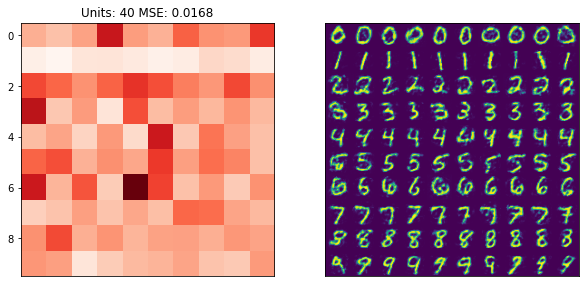

In [64]:
# model 1 MSE
MSE_AE1=plot_results(my_NN_1,x_test,hidden_arch[0])
MSE_AE.append(np.log2(MSE_AE1))

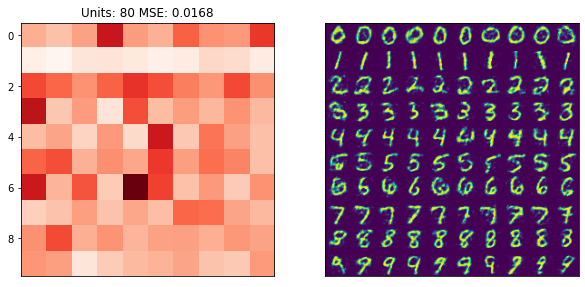

In [65]:
# model 2 MSE
MSE_AE2=plot_results(my_NN_2,x_test,hidden_arch[1])
MSE_AE.append(np.log2(MSE_AE2))

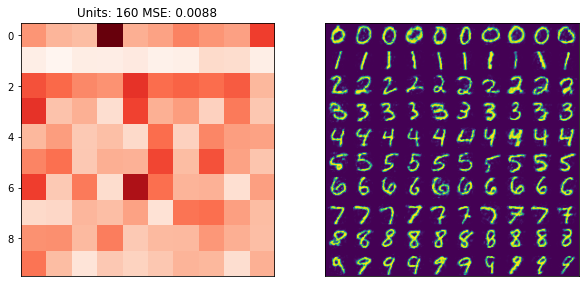

In [66]:
# model 3 MSE
MSE_AE3=plot_results(my_NN_3,x_test,hidden_arch[2])
MSE_AE.append(np.log2(MSE_AE3))

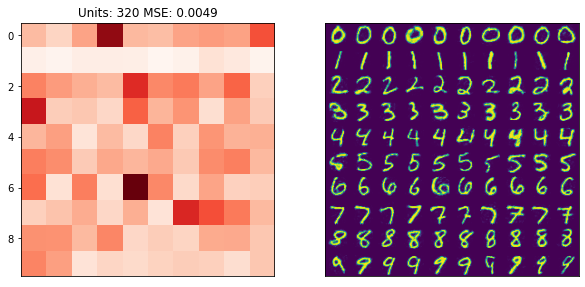

In [68]:
# model 4 MSE
MSE_AE4=plot_results(my_NN_4,x_test,hidden_arch[3])
MSE_AE.append(np.log2(MSE_AE4))

### c) display the reconstructed images of 100 test instances created with the best traditional AE of the minimum averaged MSE 
From the 3 sets of MSE,the best AE is the one use 80 units as hidden layer

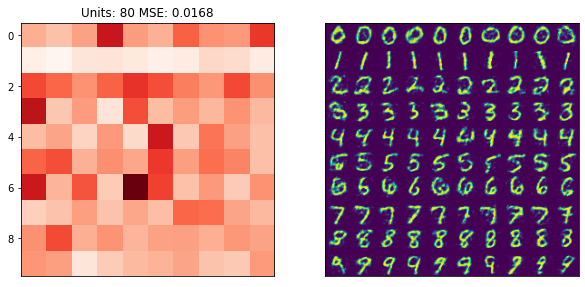

0.016752192337516545

In [38]:
plot_results(my_NN_2,x_test,hidden_arch[1])

### a) How to train the denoising(DAE) of tied weights
Fist we need to add Gaussian noise to the dataset:
1. Use numpy to generate Gaussian noise with the same dimension as the dataset.
2. Add gaussian noise to the clean dataset = X_train + noise

In [42]:
#Train a DAE
#add gaussian noise to data 
#Gaussian noise,zero mean, 0.1 standard deviation
mu, sigma = 0, 0.1 
noi = np.random.normal(mu, sigma) 
#clip the noise
noise=np.clip(noi,X_train.mean(),X_train.max())
#
corrupted_data = X_train + noise

#### model1

In [43]:
my_DAE1 = Network([784,hidden_arch[0],784],activations=["sigmoid"])
my_DAE1.tie_layer_weights(1,3) 
my_DAE1.set_lr(1.0,momentum=0.0)  #set learning rate and momentum
my_DAE1.fit(corrupted_data,corrupted_data,Xtest,Xtest,batch_size=100,patience=25,epochs=150) 

143:	 train err: 0.02568	 val err: 0.04045	 patience: 25	
 Patience condition reached,best validation performance: 0.03869157937574847


#### model2

In [44]:
my_DAE2 = Network([784,hidden_arch[1],784],activations=["sigmoid"])
my_DAE2.tie_layer_weights(1,3) 
my_DAE2.set_lr(1.0,momentum=0.0)  #set learning rate and momentum
my_DAE2.fit(corrupted_data,corrupted_data,Xtest,Xtest,batch_size=100,patience=25,epochs=150) 

150:	 train err: 0.01791	 val err: 0.03032	 patience: 13	

#### model3

In [45]:
my_DAE3 = Network([784,hidden_arch[2],784],activations=["sigmoid"])
my_DAE3.tie_layer_weights(1,3) 
my_DAE3.set_lr(1.0,momentum=0.0)  #set learning rate and momentum
my_DAE3.fit(corrupted_data,corrupted_data,Xtest,Xtest,batch_size=100,patience=25,epochs=150) 

119:	 train err: 0.01382	 val err: 0.02238	 patience: 25	
 Patience condition reached,best validation performance: 0.020098350164215923


#### model4

In [46]:
my_DAE4 = Network([784,hidden_arch[3],784],activations=["sigmoid"])
my_DAE4.tie_layer_weights(1,3) 
my_DAE4.set_lr(1.0,momentum=0.0)  #set learning rate and momentum
my_DAE4.fit(corrupted_data,corrupted_data,Xtest,Xtest,batch_size=100,patience=25,epochs=150) 

150:	 train err: 0.00859	 val err: 0.01501	 patience: 13	

### b) display the DAE MSE

In [69]:
MSE_DAE=[]

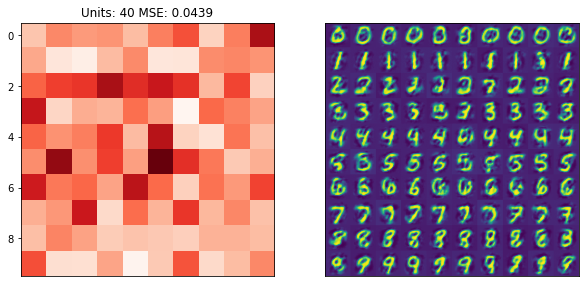

In [70]:
#plot model1
MSE_DAE1=plot_results(my_DAE1,x_test,hidden_arch[0])
MSE_DAE.append(np.log2(MSE_DAE1))

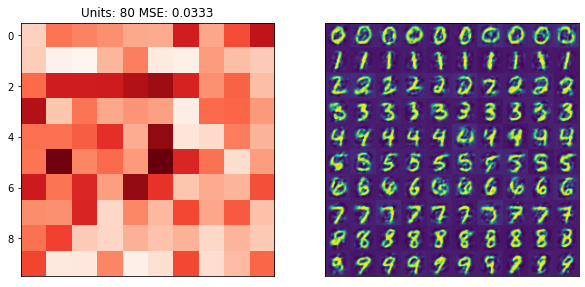

In [71]:
#plot model2
MSE_DAE2=plot_results(my_DAE2,x_test,hidden_arch[1])
MSE_DAE.append(np.log2(MSE_DAE2))

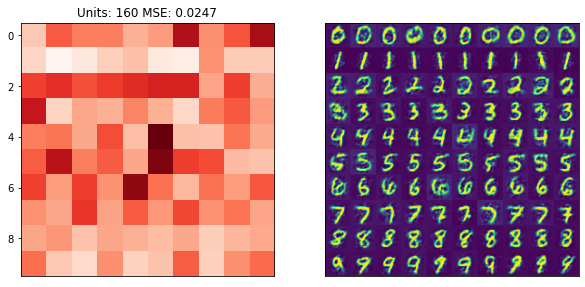

In [72]:
#plot model3
MSE_DAE3=plot_results(my_DAE3,x_test,hidden_arch[2])
MSE_DAE.append(np.log2(MSE_DAE3))

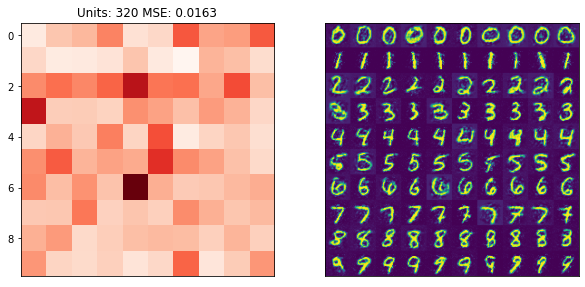

In [73]:
#plot model4
MSE_DAE4=plot_results(my_DAE4,x_test,hidden_arch[3])
MSE_DAE.append(np.log2(MSE_DAE4))

### c) Display the reconstructed images of 100 test instances created with the best DAE of the minimum averaged MSE 
From the 3 sets of MSE plots,the best DAE is the one use 320 units as hidden layer

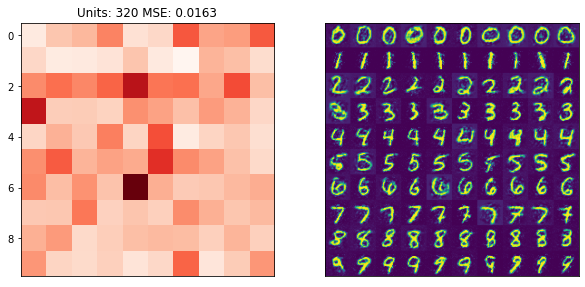

0.016314861031710017

In [51]:
plot_results(my_DAE4,x_test,hidden_arch[3])

### a) How to train the RBM
Use RBM.reconstruct() to produce the input reconstruction

#### model1

In [57]:
#Here use the RBM class to obtain your results.
#The RBM has to have gaussian visible and binomial hidden units
#RBM.reconstruct() 
my_RBM1=RBM(n_vis=784,n_hid=hidden_arch[0], use_gaussian_visible_sampling=False,
    use_gaussian_hidden_sampling=False, use_sample_vis_for_learning=False)
my_RBM1.set_lr(lr=0.01,lr_decay=0.0,weight_decay=0.0,momentum=0.5)  #set learning rate and momentum
my_RBM1.fit(X_train,xtest,batch_size=100,epochs=1500,patience=25)

765:	 train err: 0.02695	 val err: 0.02705	 patience: 25	
 Patience condition reached,best validation performance: 0.026957046132116445


#### model2

In [59]:
my_RBM2=RBM(n_vis=784,n_hid=hidden_arch[1], use_gaussian_visible_sampling=False,
    use_gaussian_hidden_sampling=False, use_sample_vis_for_learning=False)
my_RBM2.set_lr(lr=0.01,lr_decay=0.0,weight_decay=0.0,momentum=0.5)  #set learning rate and momentum
my_RBM2.fit(X_train,xtest,batch_size=100,epochs=1500,patience=25)

903:	 train err: 0.01767	 val err: 0.01834	 patience: 25	
 Patience condition reached,best validation performance: 0.018139064869400992


#### model3

In [60]:
my_RBM3=RBM(n_vis=784,n_hid=hidden_arch[2], use_gaussian_visible_sampling=False,
    use_gaussian_hidden_sampling=False, use_sample_vis_for_learning=False)
my_RBM3.set_lr(lr=0.01,lr_decay=0.0,weight_decay=0.0,momentum=0.5)  #set learning rate and momentum
my_RBM3.fit(X_train,xtest,batch_size=100,epochs=1500,patience=25)

829:	 train err: 0.01155	 val err: 0.01257	 patience: 25	
 Patience condition reached,best validation performance: 0.012390354751986517


#### model4

In [61]:
my_RBM4=RBM(n_vis=784,n_hid=hidden_arch[3], use_gaussian_visible_sampling=False,
    use_gaussian_hidden_sampling=False, use_sample_vis_for_learning=False)
my_RBM4.set_lr(lr=0.01,lr_decay=0.0,weight_decay=0.0,momentum=0.5)  #set learning rate and momentum
my_RBM4.fit(X_train,xtest,batch_size=100,epochs=1500,patience=25)

1011:	 train err: 0.00768	 val err: 0.00901	 patience: 25	
 Patience condition reached,best validation performance: 0.008834727577345606


### b) display the RBM MSE

In [75]:
MSE_RBM=[]

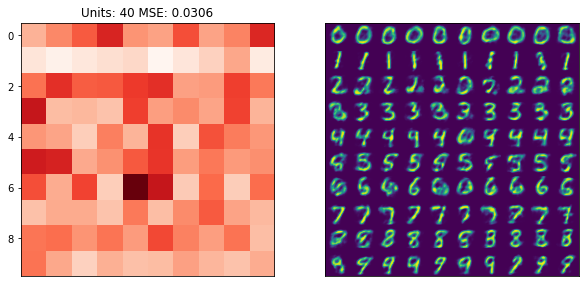

In [76]:
#modle1 MSE
MSE_RBM1=plot_results(my_RBM1,x_test,hidden_arch[0])
MSE_RBM.append(np.log2(MSE_RBM1))

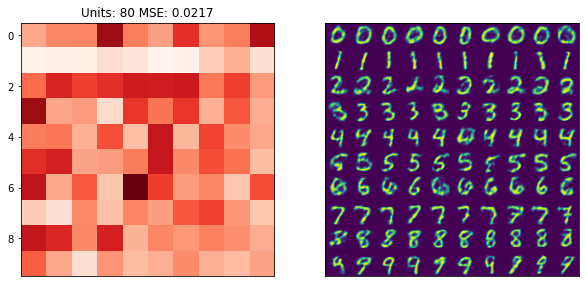

In [77]:
#modle2 MSE
MSE_RBM2=plot_results(my_RBM2,x_test,hidden_arch[1])
MSE_RBM.append(np.log2(MSE_RBM2))

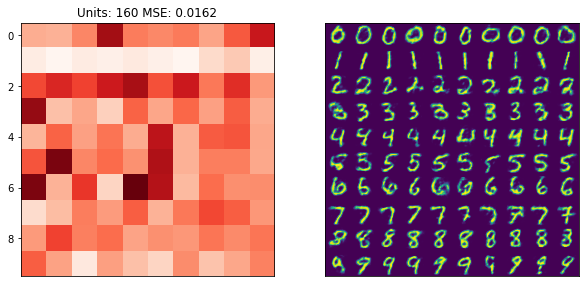

In [78]:
#modle3 MSE
MSE_RBM3=plot_results(my_RBM3,x_test,hidden_arch[2])
MSE_RBM.append(np.log2(MSE_RBM3))

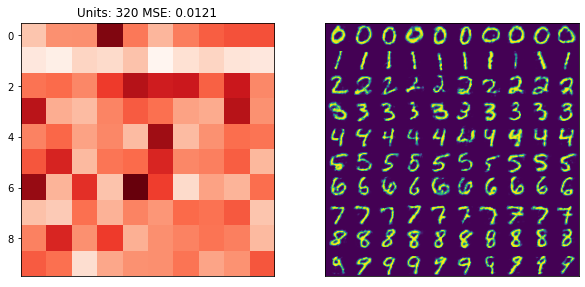

In [92]:
#modle4 MSE
MSE_RBM4=plot_results(my_RBM4,x_test,hidden_arch[3])
MSE_RBM.append(np.log2(MSE_RBM4))

### c) display the best reconstructed images 
From the 3 sets of MSE,the best RBM is the one use 320 units as hidden layer

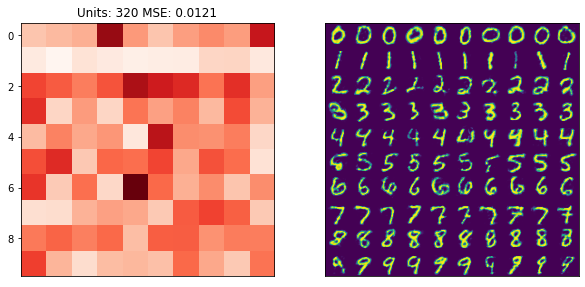

0.01214392057148305

In [102]:
plot_results(my_RBM4,x_test,hidden_arch[3])

### Create a plot comparing compression power of different AE

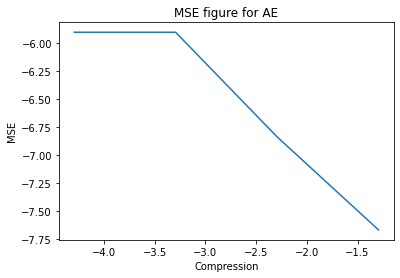

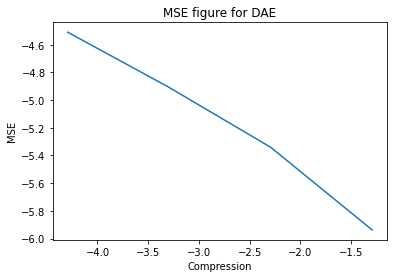

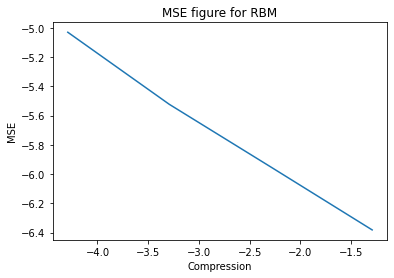

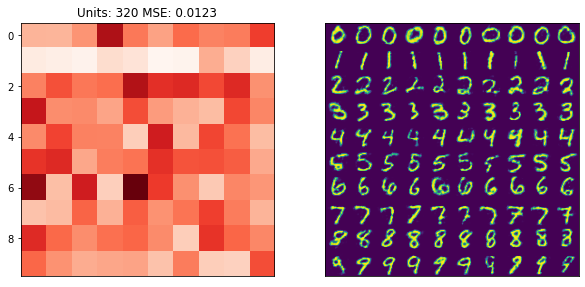

0.012259530459104589

In [89]:
#Create a plot comparing compression power of different AE
Compression_Ratio=[np.log2(p/X.shape[1])for p in hidden_arch]
# plot AE 
plt.plot (Compression_Ratio,MSE_AE)
plt.xlabel ("Compression")
plt.ylabel("MSE")
plt.title("MSE figure for AE")
plt. show()
# plot DAE
plt.plot (Compression_Ratio,MSE_DAE)
plt.xlabel("Compression")
plt.ylabel("MSE")
plt.title("MSE figure for DAE")
plt. show()
# plot RBM 
plt.plot (Compression_Ratio,MSE_RBM)
plt.xlabel ("Compression")
plt. ylabel ("MSE" )
plt. title("MSE figure for RBM")
plt.show()
# plot the best result
plot_results(my_RBM4,x_test,hidden_arch[3])

From the experiment above, the best performance for RBM is my_RBM4, use hidden_arch[3]
Hinton and Salakhutdinov found that they could use pretrained RBMs to create a good initialization state for the deep autoencoders. Let’s say that you wanted to create a 625–2000–1000–500–30 autoencoder. You would first train a 625–1000 RBM, then use the output of the 625–2000 RBM to train a 2000–1000 RBM, and so on. After you’ve trained the 4 RBMs, you would then duplicate and stack them to create the encoder and decoder layers of the autoencoder as seen in the diagram below. The researchers found that they could fine-tune the resulting autoencoder to perform much better than if they had directly trained an autoencoder with no pretrained RBMs.

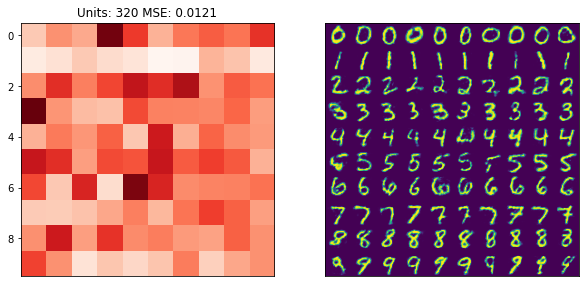

0.012108796601637929

In [215]:
#If you have any idea for improvement, start working from here.
#show the results
plot_results(my_RBM4,x_test,hidden_arch[3])

# Spatial Filer Learning

### a) implement a function that normalises the grey-level intensity of pixels to the range [0,1] within each patch image
Graph normalization with respect to the minimum and maximum value of its weights. Each entry of the normalized matrix is in the range $[0..1]$:
$$W_{norm} = \frac{(W - \min(W))}{(\max(W)-\min(W))}$$

In [113]:
def norm(X):
    X_scaled = (X-X.min(axis=0)) / (X.max(axis=0)-X.min(axis=0))
    return(X_scaled)

 ### (b) complete the implementation of two functions

In [114]:
#Complete the for loop from the diplay_filters function that visualizes the NN weights.
#To access any Network weights, use the following syntax: 
#Network.layers[layer_index].w
def display_mean_activation(nn,x,n_units=50):
    """
    Plots a scatter plot of mean activation of the first n_units neurons of the first hidden layer.
    nn - a Network class object
    x - data on which to measure the mean activation
    n_units - how many activation are meant to be displayed
    """
    plt.figure(figsize=(5,5))
    #COMPLETE BELOW
    #set first n_units weights and first n_units bias
    a=x@nn.layers[1].w[:,:n_units]+nn.layers[1].b[:n_units]
    #use sigmoid activation function
    activations = 1.0/(1+np.exp(-a))
    #sparsity degree
    mean_activations = np.mean(activations,axis=0)
    plt.scatter(x=np.arange(n_units),y=mean_activations)
    plt.xlim(int(-n_units/10),int(n_units+n_units/6))
    plt.xlabel("Hidden units")
    plt.ylabel("Mean activation")
    plt.show()
#this function is for visualise the weights associated with hidden units in the SAE
def display_filters(nn):
    """
    Complete a function that visualizes the weights inside
    the second hidden layer of the nn in a 10x10 grid.
    Use the plt.subplot() to create 100 subplots.
    nn - a Network class object
    """
    plt.figure(figsize=(7,7))
    #for 100 hidden neurons
    for i in range(100):
        #COMPLETE BELOW, IT CAN TAKE MORE OR LESS LINES THEN 3
        #create 100 subplots
        plt.subplot(10,10,i+1)  
        #the weights inside the second hidden layer of the nn
        W_t = nn.layers[1].w[:,i]
        W=np.reshape(W_t,newshape=(8,8))
        plt.imshow(W,cmap="bwr")
        plt.axis('off')        
    plt.show()

## (c) Display two functions and finding a good λ for a given ρ choice

###  how to finding optimal λ for a given ρ choice
The scatter plot down below shows units that will be activated, which allows us to check the sparse degree of the hidden layer.<br/> we want the lowest amount of units to be activated so we want activation means are closer to the sparsity value.(ρ and λ). This being said, if a shoosen λ make all points close to eachother around percific value in the mean_activations plot, it will indicates optimal sparsity value ρ .<br/>


In [115]:
#Load and preprocess the dataset
X_patches = np.load(PATCHES_DIR,allow_pickle=True)
#Here, you have to preprocess the dataset
# build the scaled patches
X_patches=norm(X_patches) 

#### reshape the trainning set from (100000, 8,8) to (100000,64) 

In [116]:
X_patches=X_patches.reshape(100000,64) 
X_patches.shape

(100000, 64)

In [118]:
X_patches_train, X_patches_test=train_test_split(X_patches, test_size=0.33, random_state=0,shuffle=True)

#### Set 3 sets of network to select best lambda and rho

#### model1, λ =0.002, ρ=0.3. the part for trainning model has commented out.

60:	 train err: 0.00127	 val err: 0.0	 patience: 0	

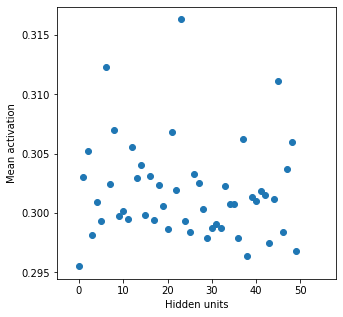

In [133]:
#set first Network, 
my_SAE1 = Network([64,100,64],activations=["sigmoid"]) #define a network architecture
my_SAE1.set_lr(lr=1.0,momentum=0.5)  #set learning rate and momentum
my_SAE1.layers[2].enable_sparsity(0.002,0.3)
''''
my_SAE1.fit(X_patches_train,X_patches_train,batch_size=500,epochs=60,patience=10) #fit to data
''''
display_mean_activation(my_SAE1,X_patches,n_units=50)

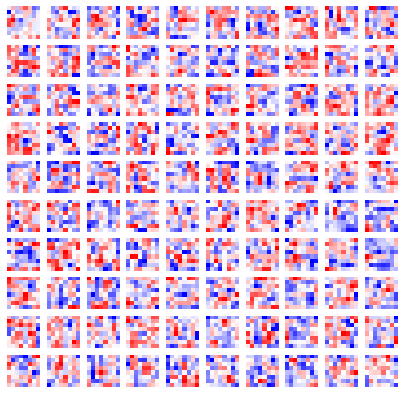

In [136]:
#display weight vectors associated with all 100 hidden neurons
display_filters(my_SAE1)

#### model2, λ =0.003, ρ=0.15. the part for trainning model has commented out.

60:	 train err: 0.00155	 val err: 0.0	 patience: 0	

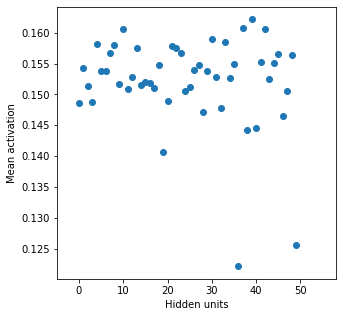

In [135]:
#set second Network, 
my_SAE2 = Network([64,100,64],activations=["sigmoid"]) #define a network architecture
my_SAE2.set_lr(lr=1.0,momentum=0.5)  #set learning rate and momentum
my_SAE2.layers[2].enable_sparsity(0.003,0.15)
''''
my_SAE2.fit(X_patches_train,X_patches_train,batch_size=500,epochs=60,patience=10) #fit to data
''''
display_mean_activation(my_SAE2,X_patches,n_units=50)

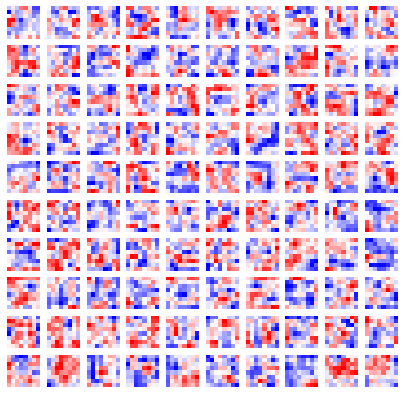

In [137]:
#display weight vectors associated with all 100 hidden neurons
display_filters(my_SAE2)

#### model3, λ =0.005, ρ=0.13. the part for trainning model has commented out.

60:	 train err: 0.00177	 val err: 0.0	 patience: 0	

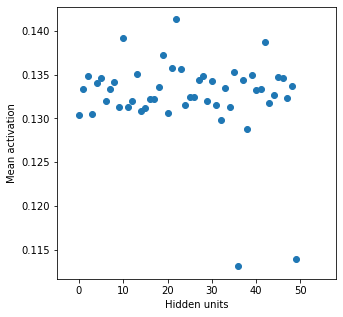

In [139]:
#set third Network, 
my_SAE3 = Network([64,100,64],activations=["sigmoid"]) #define a network architecture
my_SAE3.set_lr(lr=1.0,momentum=0.5)  #set learning rate and momentum
my_SAE3.layers[2].enable_sparsity(0.005,0.13)
''''
my_SAE3.fit(X_patches_train,X_patches_train,batch_size=500,epochs=60,patience=10) #fit to data
''''
display_mean_activation(my_SAE3,X_patches,n_units=50)

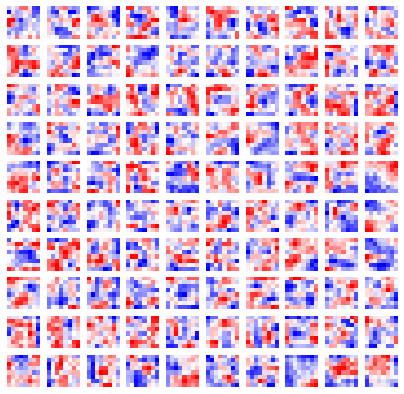

In [140]:
#display weight vectors associated with all 100 hidden neurons
display_filters(my_SAE3)

#### The result
From obsering the 3 Mean activation pragh above, we can see that the third sets of λ and ρ give the best results(Most of points are close to eachother around percific value) in the mean_activations plot, which are 0.005, 0.13 respectively. 

# Visualization

The values in binaryalphadigits are all between 0-1, hence don't need to normalisation

In [192]:
#binaryalphadigits.npz that has been pre-split into training and test subsets, 
# Load the data for the current assignment: binary alphadigits dataset.
# Please apply any data preprocessing / splitting in this cell.
alphadigits_data = np.load(ALPHADIGITS_DIR,allow_pickle=True)
X_adig = alphadigits_data['X']
y_adig = alphadigits_data['y_labels']   
X_adig_data=X_adig.reshape(X_adig.shape[0]*X_adig.shape[1],X_adig.shape[2]*X_adig.shape[3])
y_adig_label=np.repeat(y_adig,39).reshape(-1,1)
X_adig_train, X_adig_test, y_adig_train, y_adig_test = train_test_split(
    X_adig_data, y_adig_label, test_size=0.33, random_state=0,shuffle=True,stratify=y_adig_label)

In [193]:
#get X_adig.shape to determin y_adig_label
X_adig.shape

(36, 39, 20, 16)

### (a) Experimental procedure

Deep AEs' encoder and decoder has symetric architecture, this means encoder architecuture=[320,250,150,50,25,2] decoder architecture=[2,25,50,150,250,320]

In [209]:
encoder_arch=[320,250,150,50,25,2]
encoder_activations=["sigmoid","sigmoid","sigmoid","sigmoid","linear"]
coding_layer=[2]
decoder_arch_without_coding_layer=[25,50,150,250,320]
decoder_activations=["sigmoid","sigmoid","sigmoid","sigmoid","sigmoid"]
layer=encoder_arch+decoder_arch_without_coding_layer
activations=encoder_activations+decoder_activations
layer

[320, 250, 150, 50, 25, 2, 25, 50, 150, 250, 320]

### Use plot_alphadigit_results to fiind best lr
Compare the reconstruction error to deside the best lr 

In [207]:
#create Deep_AE network
my_Deep_AE=Network(layer,activations)
my_Deep_AE.set_lr(lr=0.25,momentum=0.5)#set learning rate and momentum
my_Deep_AE.fit(X_adig_train,X_adig_train,X_adig_test,X_adig_test,batch_size=64,patience=40,epochs=300) 

78:	 train err: 0.2317	 val err: 0.23122	 patience: 40		
 Patience condition reached,best validation performance: 0.23114151654590626


In [175]:
pretrain_autoencoder(my_Deep_AE, X_adig_train, X_adig_train, 
                     rbm_lr=0.1, rbm_use_gauss_visible=False, 
                     rbm_use_gauss_hidden=False, rbm_mom=0.5, 
                     rbm_weight_decay=0.0, rbm_lr_decay=0.0, 
                     rbm_batch_size=100, rbm_epochs=500,rbm_patience=25)


Fine tuning layer number 0
500:	 train err: 0.00497	 val err: 0.00486	 patience: 1		
Fine tuning layer number 1
500:	 train err: 0.01927	 val err: 0.01895	 patience: 3		
Fine tuning layer number 2
374:	 train err: 0.06792	 val err: 0.06745	 patience: 25			
 Patience condition reached,best validation performance: 0.06701061629204717

Fine tuning layer number 3
316:	 train err: 0.0742	 val err: 0.07458	 patience: 25							
 Patience condition reached,best validation performance: 0.0732772517483935

Fine tuning layer number 4
112:	 train err: 0.16401	 val err: 0.16377	 patience: 25			
 Patience condition reached,best validation performance: 0.16323380109671934
Pre training finished!


### b) report the minimum averaged reconstruction error achieved on the test data along with the learning rate leading to this result
lr=0.25

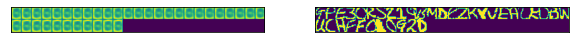

0.23092034754172636

In [241]:
plot_alphadigit_results(my_Deep_AE,X_adig_test,y_adig)

### (c) display the 2-D representations of all test images 

In [161]:
#get network summary to get layer id
my_DAE.get_summary()

0: Input	 in:(None, 320)	 out:(None, 320)
1: Dense	 in:(None, 320)	 out:(None, 250)
2: Sigmoid	 in:(None, 250)	 out:(None, 250)
3: Dense	 in:(None, 250)	 out:(None, 150)
4: Sigmoid	 in:(None, 150)	 out:(None, 150)
5: Dense	 in:(None, 150)	 out:(None, 50)
6: Sigmoid	 in:(None, 50)	 out:(None, 50)
7: Dense	 in:(None, 50)	 out:(None, 25)
8: Sigmoid	 in:(None, 25)	 out:(None, 25)
9: Dense	 in:(None, 25)	 out:(None, 2)
10: Linear	 in:(None, 2)	 out:(None, 2)
11: Dense	 in:(None, 2)	 out:(None, 25)
12: Sigmoid	 in:(None, 25)	 out:(None, 25)
13: Dense	 in:(None, 25)	 out:(None, 50)
14: Sigmoid	 in:(None, 50)	 out:(None, 50)
15: Dense	 in:(None, 50)	 out:(None, 150)
16: Sigmoid	 in:(None, 150)	 out:(None, 150)
17: Dense	 in:(None, 150)	 out:(None, 250)
18: Sigmoid	 in:(None, 250)	 out:(None, 250)
19: Dense	 in:(None, 250)	 out:(None, 320)
20: Sigmoid	 in:(None, 320)	 out:(None, 320)


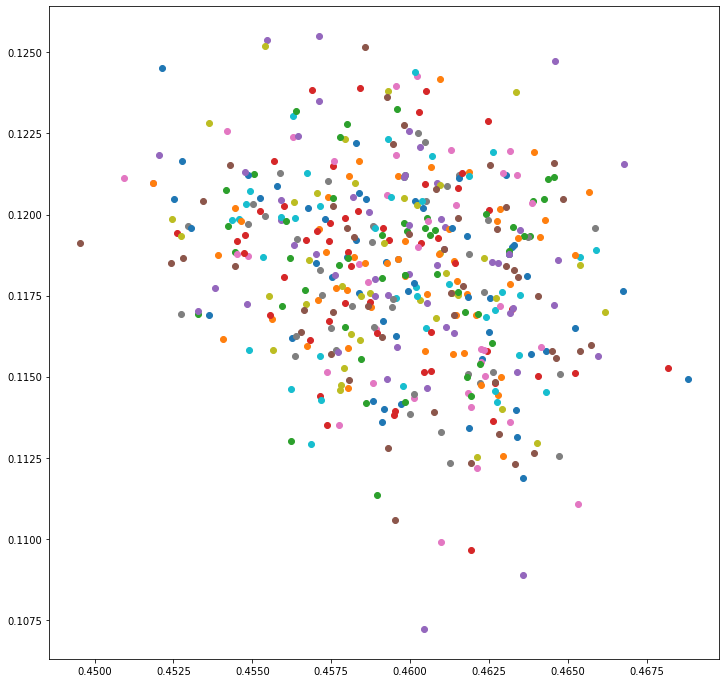

In [216]:
representation=my_Deep_AE.get_layer_output(X_adig_test,n=9)
plt.figure(figsize=(12,12))
colormap=plt.cm.gist_ncar
colors=[colormap(i)for i in np.linspace(0,0.9,36)]
for i in range(36):
    plt.scatter(representation[i*13:(i+1)*13:,0],
               representation[i*13:(i+1)*13:,1],)

### a) Find optimal hyperparameter 
Compare the reconstruction error to deside the best lr 

#### Define the network,with random initialisation

In [219]:
X_adig_train2, X_adig_test2, y_adig_train2, y_adig_test2 = train_test_split(
    X_adig_data, y_adig_label, test_size=0.33, random_state=42,shuffle=True,stratify=y_adig_label)

In [220]:
# Define the network architecture and use the pretrain_autoencoder function to pretrain it.
# Define the network,with random initialisation
my_Deep_AE1=Network(layer,activations)
my_Deep_AE1.set_lr(lr=0.1,momentum=0.3)#set learning rate and momentum
my_Deep_AE1.fit(X_adig_train2,X_adig_train2,X_adig_test2,X_adig_test2,batch_size=64,patience=40,epochs=300) 

156:	 train err: 0.23178	 val err: 0.23053	 patience: 40		
 Patience condition reached,best validation performance: 0.2305095958978957


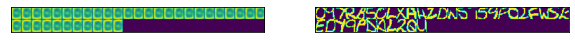

0.22835411177616305

In [221]:
#plot_alphadigit_results to visualize the reconstructions before fine-tuning
plot_alphadigit_results(my_Deep_AE1,X_adig_test2,y_adig)

In [222]:
# Fine-tune the pre-trained autoencoder. You can also use the
# plot_alphadigit_results to visualize the reconstructions before and after fine-tuning
pretrain_autoencoder(my_Deep_AE1, X_adig_train2, X_adig_train2, 
                     rbm_lr=0.1, rbm_use_gauss_visible=False, 
                     rbm_use_gauss_hidden=False, rbm_mom=0.5, 
                     rbm_weight_decay=0.0, rbm_lr_decay=0.0, 
                     rbm_batch_size=100, rbm_epochs=500,rbm_patience=25)


Fine tuning layer number 0
500:	 train err: 0.00496	 val err: 0.005	 patience: 0	1	
Fine tuning layer number 1
500:	 train err: 0.0194	 val err: 0.01956	 patience: 2			
Fine tuning layer number 2
472:	 train err: 0.06584	 val err: 0.06575	 patience: 25	
 Patience condition reached,best validation performance: 0.06556090524410192

Fine tuning layer number 3
384:	 train err: 0.07245	 val err: 0.07182	 patience: 25			
 Patience condition reached,best validation performance: 0.07160038107271634

Fine tuning layer number 4
291:	 train err: 0.1646	 val err: 0.16456	 patience: 25								
 Patience condition reached,best validation performance: 0.163410230780047
Pre training finished!


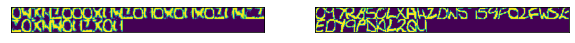

0.336891562430073

In [225]:
#plot_alphadigit_results to visualize the reconstructions after fine-tuning
plot_alphadigit_results(my_Deep_AE1,X_adig_test2,y_adig)

### c) Display 2-d results 

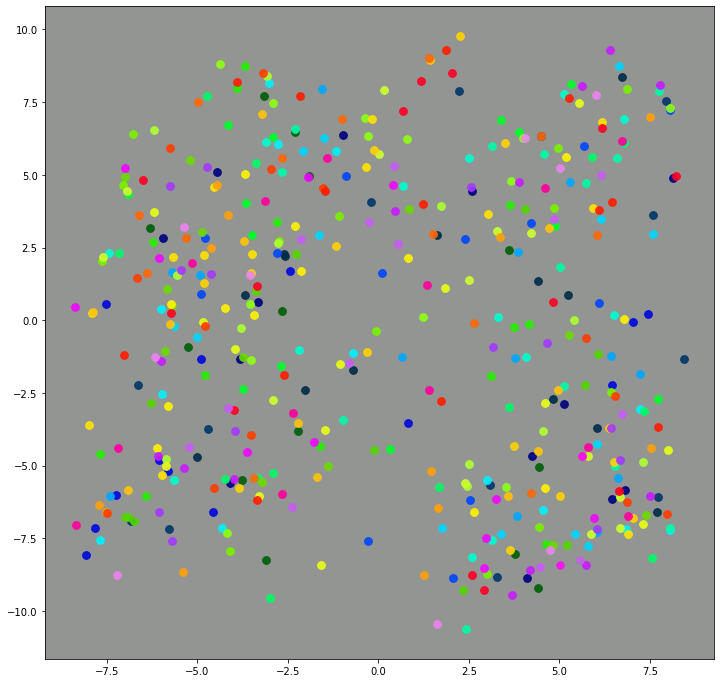

In [230]:
#Plot the 2D digit representations on a scatter plot from the x_test_2 dataset.
#Remember to use different colours for different digits!
representation2=my_Deep_AE1.get_layer_output(X_adig_test2,n=9)
plt.figure(figsize=(12,12))
colormap = plt.cm.gist_ncar #nipy_spectral, Set1,Paired
colors = [colormap(i) for i in np.linspace(0, 0.9,36)]
for i in range(36):
    plt.scatter(representation2[i*13:(i+1)*13:,0],
                representation2[i*13:(i+1)*13:,1],
                label=str(i),
                s=60,
                c=np.array(colors[i]).reshape(1,-1),
                alpha=0.9)
ax = plt.gca()
ax.set_facecolor('xkcd:grey')
plt.show()


In [229]:
#Create and train another network, this time without pretraining.
#You can use the plot_results function to see the results.
my_Deep_AE2=Network(layer,activations)
my_Deep_AE2.set_lr(lr=0.1,momentum=0.3)#set learning rate and momentum
my_Deep_AE2.fit(X_adig_train2,X_adig_train2,X_adig_test2,X_adig_test2,batch_size=64,patience=40,epochs=300) 

156:	 train err: 0.23178	 val err: 0.23053	 patience: 40	
 Patience condition reached,best validation performance: 0.2305095958978957


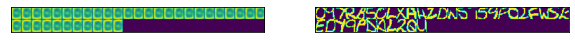

0.22835411177616305

In [231]:
plot_alphadigit_results(my_Deep_AE2,X_adig_test2,y_adig)

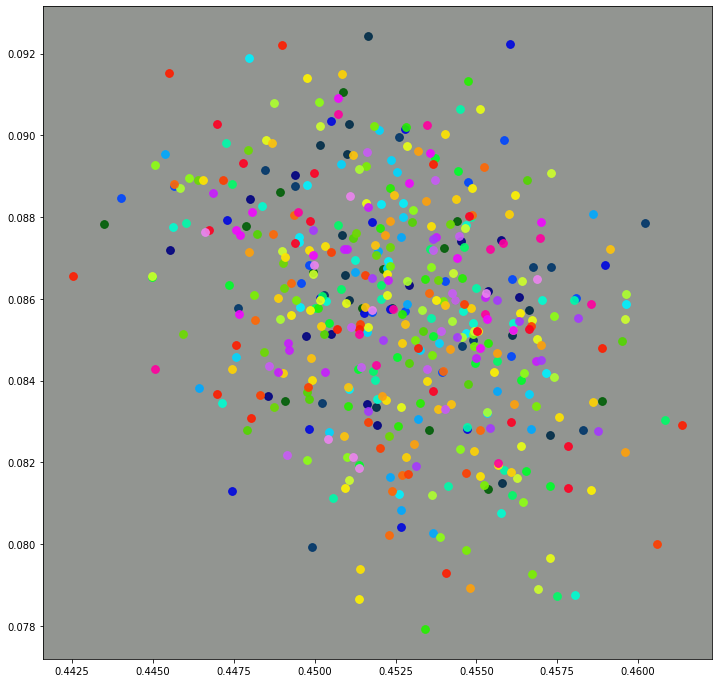

In [232]:
#Plot the 2D digit representations on a scatter plot from the x_test_2 dataset.
#Remember to use different colours for different digits!
representation3=my_Deep_AE2.get_layer_output(X_adig_test2,n=9)
plt.figure(figsize=(12,12))
colormap = plt.cm.gist_ncar #nipy_spectral, Set1,Paired
colors = [colormap(i) for i in np.linspace(0, 0.9,36)]
for i in range(36):
    plt.scatter(representation3[i*13:(i+1)*13:,0],
                representation3[i*13:(i+1)*13:,1],
                label=str(i),
                s=60,
                c=np.array(colors[i]).reshape(1,-1),
                alpha=0.9)
ax = plt.gca()
ax.set_facecolor('xkcd:grey')
plt.show()

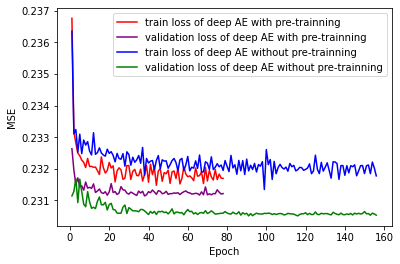

In [239]:
#Create a plot of training metrics.
#AE contains pre-trainning
train_err1 = my_Deep_AE.train_err_hist
epoch1=[i for i in range(1,len(train_err1)+1)]
val_err1 = my_Deep_AE.val_err_hist
epoch2=[i for i in range(1,len(val_err1)+1)]
#AE doesn't contain pre-trainning
train_err2 = my_Deep_AE2.train_err_hist
epoch3=[i for i in range(1,len(train_err2)+1)]
val_err2 = my_Deep_AE2.val_err_hist
epoch4=[i for i in range(1,len(val_err2)+1)]
plt.plot(epoch1,train_err1,color='r',label='train loss of deep AE with pre-trainning')
plt.plot(epoch2,val_err1,color='purple',label='validation loss of deep AE with pre-trainning')
#plt.scatter(train_err1,val_err1)
#plt.scatter(train_err2,val_err2)
plt.plot(epoch3,train_err2,color='b',label='train loss of deep AE without pre-trainning')
plt.plot(epoch4,val_err2,color='g',label='validation loss of deep AE without pre-trainning')
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.show()

#### c) differences between results 
The validation loss of deep AE without pre-training is less than train loss of deep AE without pre-trainning, moreover, the validation loss of deep AE with pre-trainning is less than train loss of deep AE with pre trainning. This is probabaly because the deep AE without pre-trinning using random initialisation